
# Wine classification project

The project aims to build a classification model, to classify wines into Good and Bad categories based on their quality score.

There are various input parameters provided, which we need to study, to check which parameter impacts the quality of the wine.
These inputs are -

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

We need to predict the quality (target variable) here.

In [894]:
#Importing the necessary libraries first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [895]:
#Loading data into a dataframe using pandas 

df = pd.read_csv('wine.csv')

In [896]:
#Checking loaded data

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset consists of 1599 different rows and 12 columns.

In [897]:
#Lets check some details of the data

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [898]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above data, it appears like 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide' columns contains outliers, comparing the difference between the mean value and the max value.
We will confirm these points going further.

In [899]:
#Lets check the data types

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the input variables are of float category, which indicates that we have numbers in all rows/columns. There are no NaN values, since no data is of object type.

The result output is an integer value.

In [900]:
#Confirming the absence of NaN values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence, we confirm that no NaN values are present in the data.

Since we need our output as 'Good' and 'Bad', lets convert the quality parameter as 0 and 1 where 0 is Bad and 1 is Good.

In [901]:
df['quality']=np.where(df['quality']>=7,1,0)

In [902]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64


# Exploratory Data Analysis

Lets now perform EDA on our data.

We have the complete data as continuous data, lets check the distribution of data for all variables first.

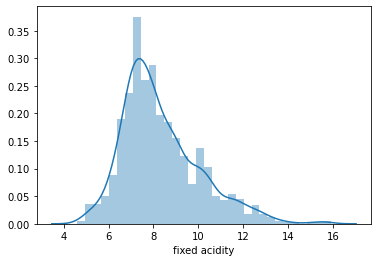

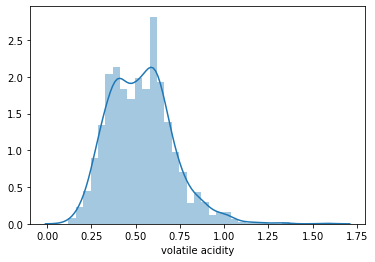

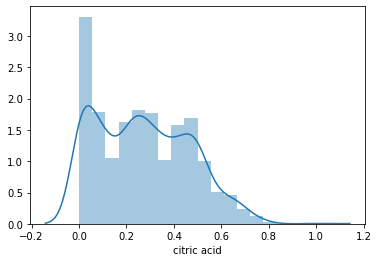

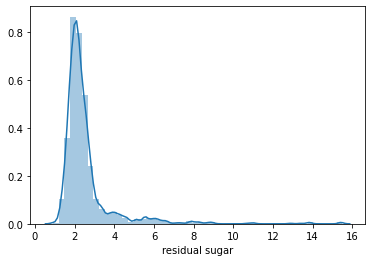

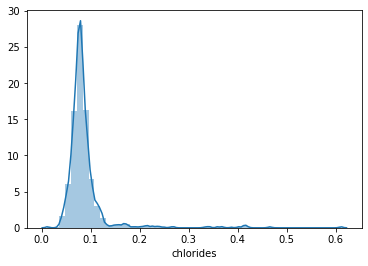

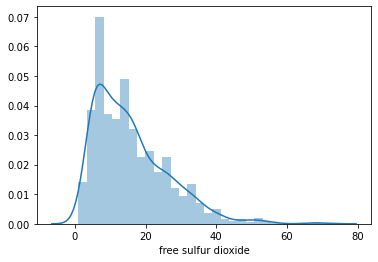

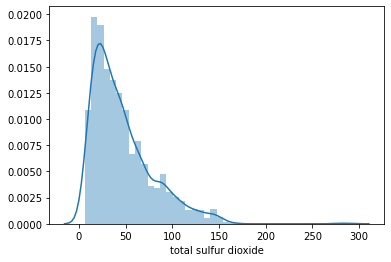

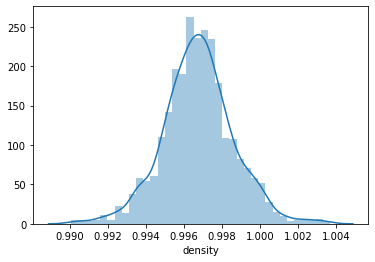

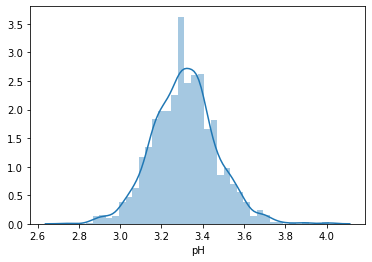

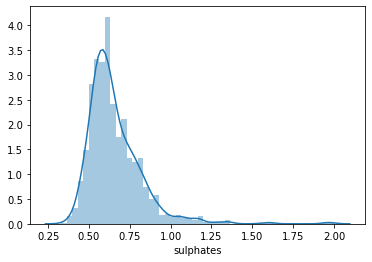

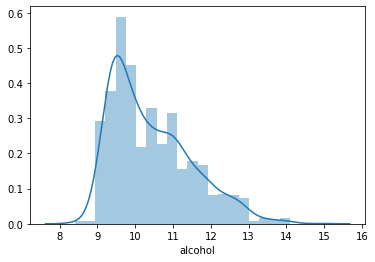

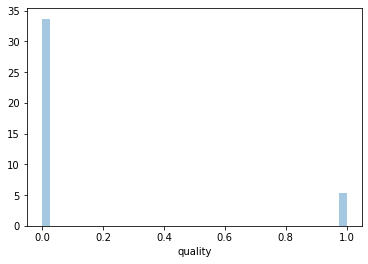

In [903]:
for i in df.columns:
    sns.distplot(df[i], kde = True)
    plt.show()

Following are the observations from the above provided distribution plots -

Fixed acidity - The data seems to be very lightly right skewed. There might be some outliers in the data. Majority of the values are near 7.

volatile acidity - The data is right skewed. Some outliers are expected. Majority of the values are near 0.60.

Citric acid - The data is right skewed, many of the values are observed as 0.0

Residual sugar - The data is highly right skewed, but it does not appear that we have outliers here. Majority values are around 2.

Chlorides - The data is highly right skewed, but it does not appear that we have outliers here. Majority of the values are around 0.1.

free sulfur dioxide - The data is right skewed, and majority of the values are around 7-8.

total sulfur dioxide - The data is right skewed and majority of the values are between 8-30.

density - The data does not display skewness. Majority of the values are near to the mean, 0.9967

pH - The data does not display skewness. Outliers are expected. Majority of the values are around 3.3

Sulphates - The data is right skewed, majority of the values are around 0.6.

Alcohol - The data is right skewed, and majority of the values are around 9.6.

The above data shows positive skewness for majority of the columns, and no negative skewed data is observed.

In [904]:
#Let us now check the correlation of the variables with the target
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


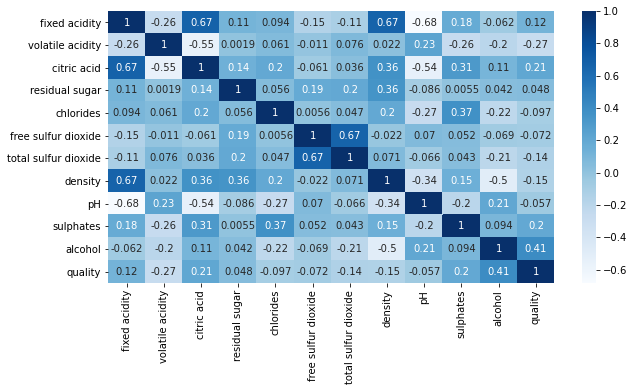

In [905]:
#Plotting a heatmap of the dataframe to check correlation with a better visualization

plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'Blues')

Following observations can be seen from the above heatmap -

Quality has a 41% correlation with alcohol, which is the highest among the given input variables.
volatile acidity has a highest negative correlation with Quality, with a 27% correlation value.


Following are the positively correlated fields -fixed acidity, citric acid, residual sugar, sulphates, alcohols.
Following are the negatively correlated fields- volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH


Residual sugar has the least correlation with Quality.


We also observe that Free sulfur dioxide and total sulfur dioxide are correlated with each other with a 67% correlation value. Free sulfur is adding to the sulfur content in the wine.
But their impact on Quality is lesser (7% and 14% correlation respectively)


Citric acid and Fixed acidity are also correlated with each other, with a 67% correlation value. 
Volatile acidity and citric acid have a 55% negative correlation.
Citric acid and fixed acidity are positively correlated, but volatile acidity is negatively correlated with citric acid. 
The volatile acidity has an impact on the Quality of the wine, and is getting determined by the amount of citric acid in the wine.


pH and fixed acidity are highly negatively correlated, with a 68% correlation value. But their impact on quality is less (5% and 12% respectively)



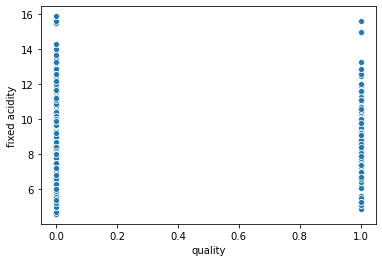

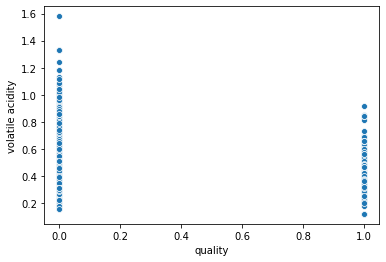

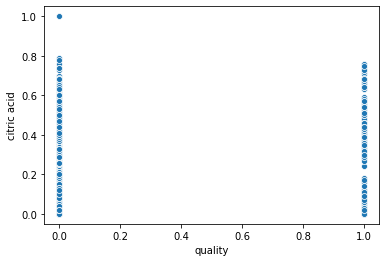

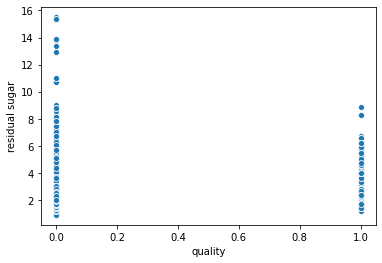

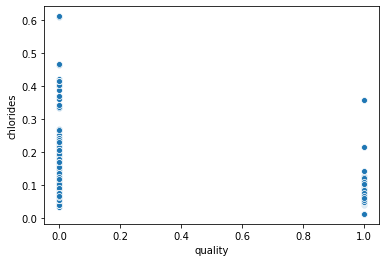

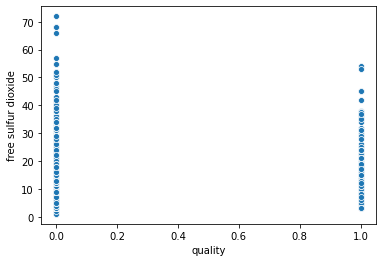

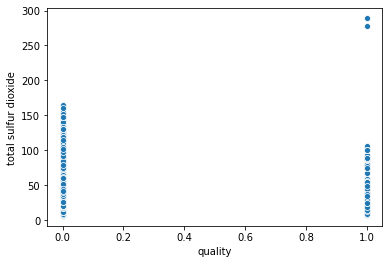

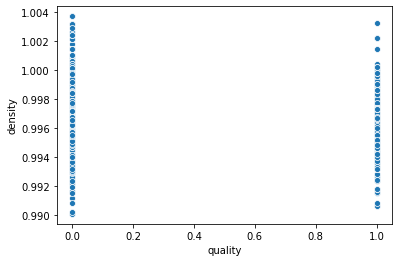

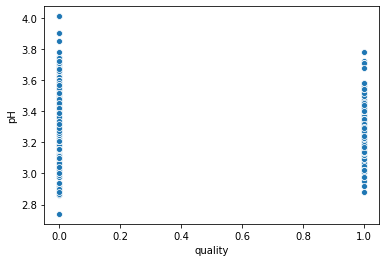

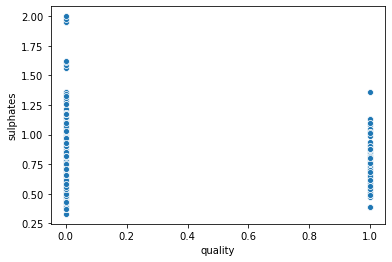

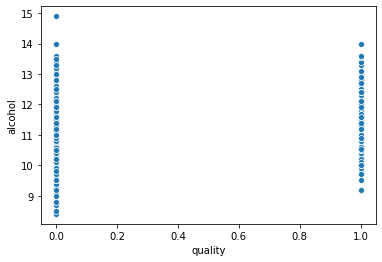

In [906]:
#Bivariate analysis

for i in df.columns.drop('quality'):
    sns.scatterplot(y = df[i], x = df['quality'])
    plt.show()

From the above graph, we see that -

As volatile acidity increases above 1, the wine is classified as Bad.

Residual sugar above 10 results in Bad wine.

As chlorides become more than 0.2, wine results in a Bad category.

Free sulfur dioxide above 40 results in bad wine.

Total sulfur dioxide above 110 results in bad wine in majority of the cases.

pH above 3.8 results in bad wine.

Sulphates above 1.25 result in bad wine.

Alcohol below 9 results in bad wine.

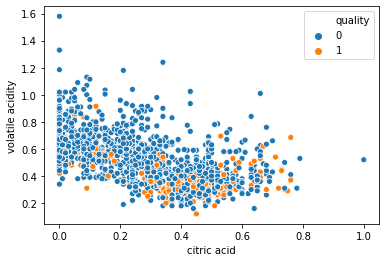

In [907]:
#Multivariate analysis

sns.scatterplot(x=df['citric acid'], y = df['volatile acidity'], hue = df['quality'])

From above graph, we see that the wines with volatile acidity between 0.2 to 0.6 and citric acid between 0.25 to 0.8 have the probabilities of being Good wines, and wines outside these ranges are generally bad.

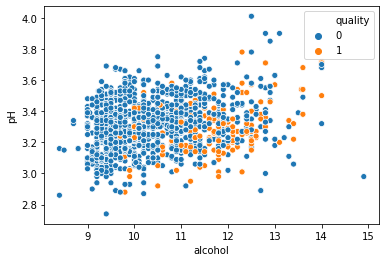

In [908]:
sns.scatterplot(x=df['alcohol'], y = df['pH'], hue = df['quality'])

From above graph, we see that the wines with pH between 2.9 to 3.8 and alcohol between 10 to 14 have the probabilities of being Good wines, and wines outside these ranges are generally bad.

# Data modeling

# Checking the outliers 

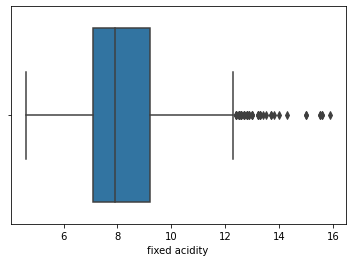

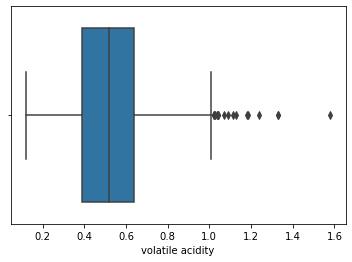

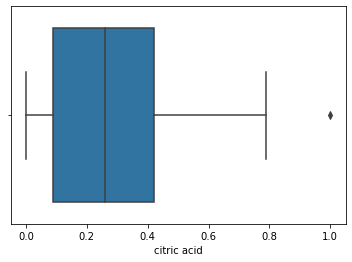

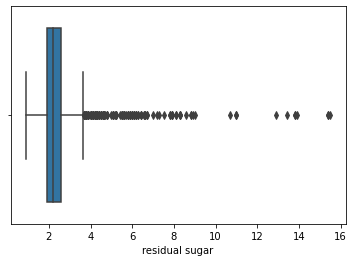

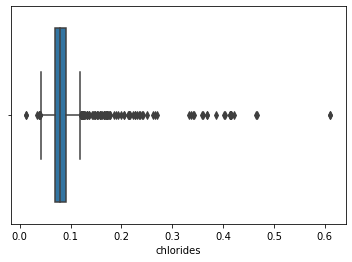

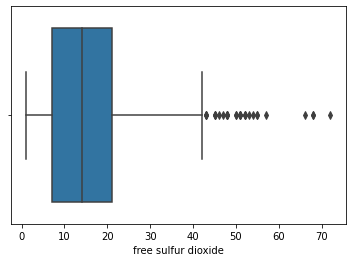

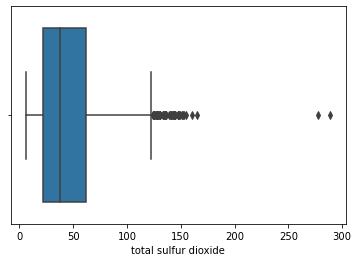

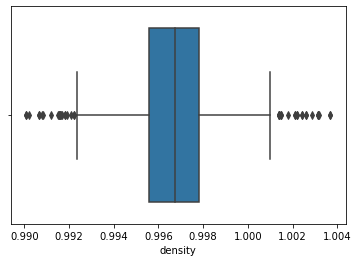

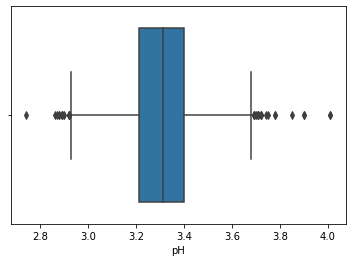

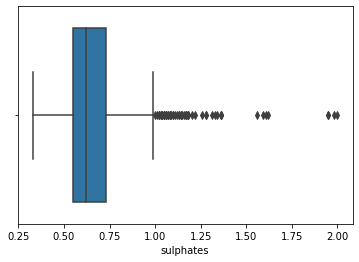

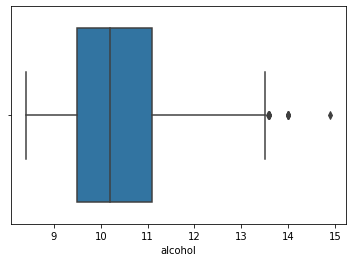

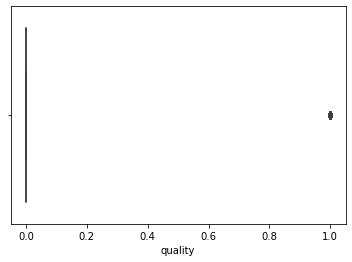

In [909]:
#Visualizing outliers using boxplot

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

From the above data, it seems like the outliers are a lot in number and may lead to a significant amount of data loss.

Let us find a count of outliers in all columns -

In [910]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [911]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                 217
dtype: int64

From the above numbers, we conclude that residual sugar has the maximum number of outliers (155).

If we take an assumption that max 155 rows would be dropped due to outliers (taking the extreme case here, that all outliers would be lying in 155 rows which will be filtered due to residual sugar outliers), we would lose ~9% of the data.
Also, considering that the values can actually be valid values on a higher/lower range and not incorrect, we will not remove the outliers in this case.

# Treating the skewness in the data

In [912]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

Considering a threshold of +/-0.5, we would need to treat fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol column.

We will use boxcox transform here to treat the skewness

In [913]:
import scipy.stats as st
from scipy.stats import boxcox

In [914]:
df['residual sugar'], lambda_x = st.boxcox(df['residual sugar'])

In [915]:
df['volatile acidity'],lambda_x = st.boxcox(df['volatile acidity'])
df['chlorides'],lambda_x = st.boxcox(df['chlorides'])
df['free sulfur dioxide'],lambda_x = st.boxcox(df['free sulfur dioxide'])
df['total sulfur dioxide'],lambda_x = st.boxcox(df['total sulfur dioxide'])
df['sulphates'],lambda_x = st.boxcox(df['sulphates'])
df['alcohol'],lambda_x = st.boxcox(df['alcohol'])
df['fixed acidity'],lambda_x = st.boxcox(df['fixed acidity'])

In [916]:
df.skew()

fixed acidity           0.000517
volatile acidity        0.000596
citric acid             0.318337
residual sugar         -0.095930
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.109367
quality                 2.129363
dtype: float64

We have successfully removed the skewness from the above data.

# Using the classification models

In [917]:
#Splitting the dependent and independent data

x = df.drop('quality', axis =1)
y = df['quality']

In [918]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.103306,-0.332419,0.00,0.450049,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482
1,1.116875,-0.124623,0.00,0.572939,-4.140122,4.102521,4.686835,0.99680,3.20,-0.476630,0.300504
2,1.116875,-0.259922,0.04,0.530233,-4.325636,3.317116,4.421290,0.99700,3.26,-0.546246,0.300504
3,1.198255,-0.997735,0.56,0.450049,-4.963593,3.504207,4.550629,0.99800,3.16,-0.737642,0.300504
4,1.103306,-0.332419,0.00,0.450049,-4.920401,2.867882,3.861490,0.99780,3.51,-0.801405,0.300482
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.054038,-0.462056,0.08,0.473382,-4.391441,4.503448,4.171856,0.99490,3.45,-0.737642,0.300535
1595,1.039149,-0.531779,0.10,0.513157,-5.614127,4.835265,4.351412,0.99512,3.52,-0.318618,0.300559
1596,1.058737,-0.590351,0.13,0.530233,-4.920401,4.341848,4.056652,0.99574,3.42,-0.336470,0.300553
1597,1.039149,-0.402230,0.12,0.473382,-4.963593,4.503448,4.171856,0.99547,3.57,-0.413072,0.300523


In [919]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [920]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [921]:
#Splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=100)


In [922]:
x_train.shape, y_train.shape

((1119, 11), (1119,))

In [923]:
dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [924]:
for i in [dt, gnb, svc, knn, lg]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print(i,accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

DecisionTreeClassifier() 0.8375
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       417
           1       0.41      0.57      0.48        63

    accuracy                           0.84       480
   macro avg       0.67      0.72      0.69       480
weighted avg       0.86      0.84      0.85       480

[[366  51]
 [ 27  36]]
GaussianNB() 0.80625
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       417
           1       0.36      0.62      0.46        63

    accuracy                           0.81       480
   macro avg       0.65      0.73      0.67       480
weighted avg       0.86      0.81      0.83       480

[[348  69]
 [ 24  39]]
SVC() 0.86875
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       417
           1       0.00      0.00      0.00        63

    accuracy                           0.87       480
   macro avg   

# Ensemble methods

In [925]:
from sklearn.ensemble import RandomForestClassifier

In [926]:
rfc = RandomForestClassifier()

In [927]:
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
print(rfc, accuracy_score(y_test, predict))
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

RandomForestClassifier() 0.9083333333333333
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       417
           1       0.69      0.54      0.61        63

    accuracy                           0.91       480
   macro avg       0.81      0.75      0.78       480
weighted avg       0.90      0.91      0.90       480

[[402  15]
 [ 29  34]]


From the above models, Random Forest Classifier is performing the best as per accuracy score. Out of classification models, Logistic Regression gave the best score.

Lets further cross validate this score.

# Cross Validation

In [928]:
from sklearn.model_selection import cross_val_score

In [929]:
for i in [dt, gnb, svc, knn, lg, rfc]:
    cv = cross_val_score(i, x, y, cv=5)
    print(i, cv.mean())

DecisionTreeClassifier() 0.8105094043887148
GaussianNB() 0.8311637931034482
SVC() 0.8642907523510971
KNeighborsClassifier() 0.8442907523510972
LogisticRegression() 0.8661598746081506
RandomForestClassifier() 0.8705485893416928


Random forest appears to be slightly overfitting in this case.
Logistic regression is giving the best accuracy and does not show overfitting.

Lets try to optimize Logistic regression model and Random Forest model to check if we can improve the model performance.

# HyperParameter tuning

In [930]:
from sklearn.model_selection import GridSearchCV

In [931]:
gcv = GridSearchCV(estimator=rfc,param_grid={'criterion':['gini','entropy'],'n_estimators':list(range(1,30)),'min_samples_split' : [2, 5, 10]})

In [ ]:
res = gcv.fit(x_train,y_train)

In [ ]:
res.best_params_

In [ ]:
res.best_score_

In [ ]:
gcv_lg = GridSearchCV(lg,{"penalty":["l1","l2"],'C':[1,10]})

In [ ]:
res2 = gcv_lg.fit(x_train,y_train)

In [ ]:
res2.best_params_

In [ ]:
res2.best_score_

Random Forest is giving the best accuracy score, hence we will be picking this model as the final model.

In [ ]:
rfc_final = RandomForestClassifier(criterion='entropy', n_estimators=28, min_samples_split = 2, random_state = 42)
rfc_final.fit(x_train, y_train)
predicted = rfc_final.predict(x_test)
print('Accuracy score', accuracy_score(y_test, predicted))

In [ ]:
result = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
result

# AUC ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rfc_final.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)


In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test,rfc_final.predict(x_test))

In [ ]:
print(auc_score)

# Saving the model

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc_final,'wine_clf.obj')

# Conclusion

In [ ]:
model = joblib.load('wine_clf.obj')
r = model.predict(x_test)
accuracy_score(y_test,r)

We have successfully tuned the model and predicted the wine qualities with 90% accuracy score using RandomForestClassifier.